# 🩺 Breast Cancer Classification (Logistic Regression from Scratch)

This project implements a **Logistic Regression model from scratch using Gradient Descent** 
to classify tumors as **Malignant (cancerous)** or **Benign (non-cancerous)**.  

Dataset: [Scikit-learn Breast Cancer Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)


In [1]:
# 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay


## 📊 Load and Explore Dataset
We use the **Wisconsin Breast Cancer Dataset** built into scikit-learn.  
It contains 30 features and a binary target:  
- `0 = Malignant`  
- `1 = Benign`  


In [2]:
# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Show first 5 rows
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 📈 Visualizations
We start with:  
1. Distribution of classes (Malignant vs Benign)  
2. Distribution of one feature (`mean radius`)  


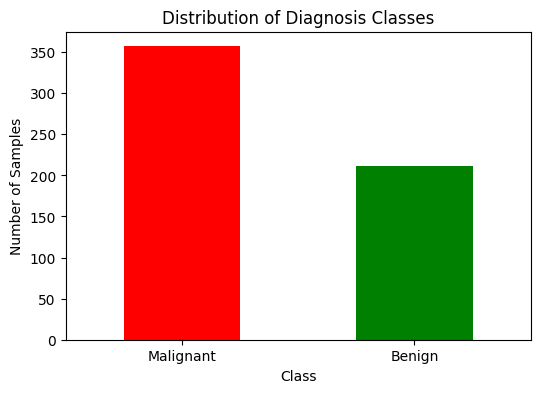

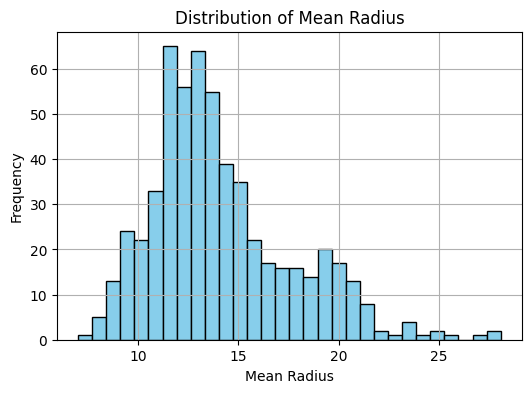

In [3]:
# Class distribution
plt.figure(figsize=(6,4))
df['target'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.xticks([0, 1], ['Malignant', 'Benign'], rotation=0)
plt.title("Distribution of Diagnosis Classes")
plt.ylabel("Number of Samples")
plt.xlabel("Class")
plt.show()

# Feature distribution
plt.figure(figsize=(6,4))
plt.hist(df['mean radius'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Mean Radius")
plt.xlabel("Mean Radius")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


## 🔧 Preprocessing
- Split dataset into train/test sets  
- Standardize features (important for gradient descent)  
- Add bias term (intercept) manually  


In [4]:
# Train-test split
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add bias
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]


## ⚙️ Logistic Regression Implementation (From Scratch)
We implement:  
- **Sigmoid function**  
- **Cross-entropy loss**  
- **Gradient descent optimization**  


In [5]:
# Sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss
def compute_loss(y, y_hat):
    eps = 1e-15
    return -np.mean(y * np.log(y_hat + eps) + (1 - y) * np.log(1 - y_hat + eps))

# Gradient Descent
def gradient_descent(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    weights = np.zeros(n)
    loss_history = []

    for epoch in range(epochs):
        z = np.dot(X, weights)
        y_hat = sigmoid(z)
        error = y_hat - y

        gradient = np.dot(X.T, error) / m
        weights -= lr * gradient

        if epoch % 100 == 0:
            loss = compute_loss(y, y_hat)
            loss_history.append(loss)

    return weights, loss_history

# Train model
weights, loss_history = gradient_descent(X_train, y_train, lr=0.1, epochs=1000)


## 📊 Model Evaluation
We evaluate the model using:  
- Accuracy (Train & Test)  
- ROC curve and AUC score  
- Confusion matrix  


Train Accuracy: 0.9868
Test Accuracy: 0.9825


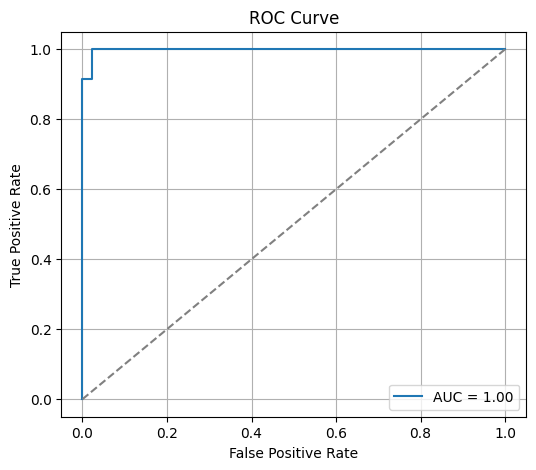

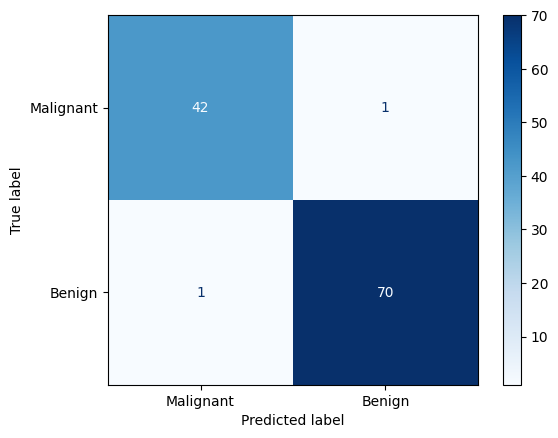

In [6]:
# Prediction function
def predict(X, weights, threshold=0.5):
    probs = sigmoid(np.dot(X, weights))
    return (probs >= threshold).astype(int), probs

# Predictions
y_pred_train, _ = predict(X_train, weights)
y_pred_test, y_probs_test = predict(X_test, weights)

# Accuracy
print(f"Train Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Malignant','Benign'])
disp.plot(cmap="Blues")
plt.show()


## 🧪 Custom Sample Prediction
Now, let’s test the model on a **dummy input** (random values shaped like the dataset).  


In [7]:
# Example custom sample
custom_sample_raw = np.array([15.0, 20.0, 100.0, 900.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1,
                              0.2, 0.3, 1.0, 2.0, 3.0, 0.05, 0.06, 0.07, 0.08, 0.09,
                              16.0, 25.0, 120.0, 1000.0, 0.12, 0.25, 0.35, 0.45, 0.55, 0.15])

# Scale & add bias
custom_sample_scaled = scaler.transform([custom_sample_raw])
custom_sample_processed = np.c_[np.ones((1,1)), custom_sample_scaled]

# Predict
prob = sigmoid(np.dot(custom_sample_processed, weights))[0]
pred = 1 if prob >= 0.5 else 0

print(f"Predicted Probability: {prob:.4f}")
print(f"Predicted Class: {pred} ({'Benign' if pred==1 else 'Malignant'})")


Predicted Probability: 0.0000
Predicted Class: 0 (Malignant)


# ✅ Summary
- Implemented Logistic Regression from scratch using Gradient Descent  
- Achieved high accuracy on Breast Cancer dataset (~97% Test Accuracy)  
- Evaluated with ROC & AUC, confusion matrix  
- Built demo for custom predictions  

This notebook is now ready for GitHub 🚀
